In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# C:/Windows/Fonts/H2GSRB.TTF
import matplotlib as mp
import matplotlib.font_manager as fm
import os
location = 'C:/Windows/Fonts/H2GSRB.TTF'
font_name = fm.FontProperties(fname=location).get_name()
mp.rc('font',family=font_name)

In [29]:
# 데이터 준비하기
filelists = ['./data/'+i for i in os.listdir('./data')]
seoul_locations = [i.split('_')[1] for i in filelists]

In [41]:
df_lists = [pd.read_csv(i,encoding='cp949',index_col=0) for i in filelists]
result = []
for idx,value in enumerate(df_lists):    
    value['지역'] = seoul_locations[idx]
    result.append(value)
    

In [42]:
df = pd.concat(result)

<AxesSubplot:>

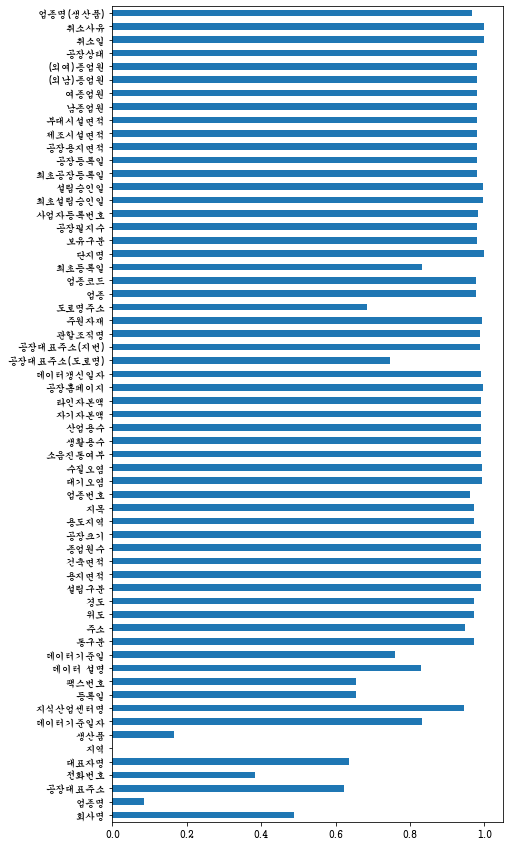

In [43]:
df.isna().mean().plot.barh(figsize=(7,15))

In [72]:
# 업종명,주소,회사명
find_cols = ['업종','주소','회사','생산','지역']
df.columns[ df.columns.str.contains('업종명')]

Index(['업종명', '업종명(생산품)'], dtype='object')

In [122]:
df_cols = [df.columns[ df.columns.str.contains(i)].to_list() for i in find_cols]
df_cols

[['업종명', '업종번호', '업종', '업종코드', '업종명(생산품)'],
 ['공장대표주소', '주소', '공장대표주소(도로명)', '공장대표주소(지번)', '도로명주소'],
 ['회사명'],
 ['생산품', '업종명(생산품)'],
 ['지역', '용도지역']]

In [123]:
# 파이썬에서 2차원리스트를 1차원으로 변경
# 중복을 제거하기 위해  set으로 리스트를 치환한다음 다시 라스트로 원복
df_cols =  sum(df_cols,[])
df_cols = list(set(df_cols))
df_cols

['지역',
 '용도지역',
 '업종명',
 '공장대표주소',
 '업종명(생산품)',
 '도로명주소',
 '회사명',
 '업종번호',
 '업종',
 '주소',
 '공장대표주소(지번)',
 '업종코드',
 '생산품',
 '공장대표주소(도로명)']

<AxesSubplot:>

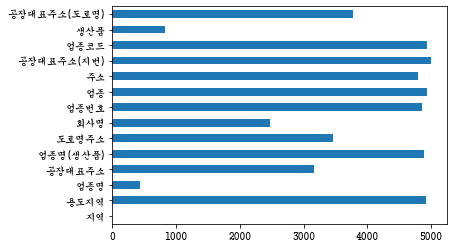

In [124]:
# 원하는 컬럼들의 결측치 시각화
df2 = df.loc[:,df_cols].copy()
df2.isna().sum().plot.barh()

In [125]:
df2.reset_index(drop=True,inplace=True)

In [126]:
# 업종명이 null인 데이터 중에서 생산품이 있는 데이터
index = df2[df2['업종명'].isna()].index
truefalse_index = df2.loc[index]['생산품'].isna() == False
index = df2.loc[index][truefalse_index].index
df2.loc[index,'업종명'] = df2.loc[index,'생산품']

In [127]:
# 업종명이 null인 데이터 중에서 업종명(생산품) 있는 데이터
index = df2[df2['업종명'].isna()].index
truefalse_index = df2.loc[index]['업종명(생산품)'].isna() == False
truefalse_index
index = df2.loc[index][truefalse_index].index
df2.loc[index,'업종명'] = df2.loc[index,'업종명(생산품)']

In [ ]:
ㅇ

<AxesSubplot:>

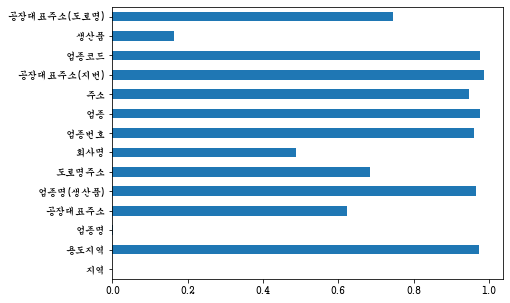

In [131]:
df2.isna().mean().plot.barh(figsize=(7,5))

In [12]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [1]:
from geopy.geocoders import Nominatim

In [2]:
from geopy.geocoders import Nominatim
def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}

    return crd
geocoding('서울특별시 강동구 상일로 31')

In [9]:
geocoding('서울특별시 강동구 양재대로103길 5')

{'lat': '37.5335625', 'lng': '127.1352089'}